# 1. Análise Exploratória de Dados (EDA)

O primeiro passo de qualquer projeto de ciência de dados é realizar uma Análise Exploratória de Dados (EDA). O objetivo é entender a estrutura, a qualidade, as distribuições e as relações presentes no nosso conjunto de dados. Esta análise nos guiará nas etapas de pré-processamento e modelagem.

### 1.1. Importação das Bibliotecas e Configurações Iniciais

Antes de começar, precisamos importar as bibliotecas que nos darão as ferramentas para carregar, manipular e visualizar os dados. Também configuraremos o estilo dos gráficos para uma melhor apresentação.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos para uma melhor visualização
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


### 1.2. Carregamento dos Dados

Com as bibliotecas prontas, o primeiro passo é carregar nosso conjunto de dados, o arquivo crop_yield.csv, para um DataFrame do Pandas. Um DataFrame é uma estrutura de tabela que nos permite manipular e analisar os dados de forma eficiente.

Usaremos o método .head() para visualizar as cinco primeiras linhas e confirmar que o carregamento foi bem-sucedido.

In [4]:
# Carregando o dataset a partir do arquivo CSV
df = pd.read_csv('crop_yield.csv')

# Exibindo as 5 primeiras linhas do DataFrame para verificar se foi carregado corretamente
df.head()

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


### 1.3. Análise da Estrutura e Estatísticas Descritivas

Após carregar os dados, é fundamental entender sua estrutura geral. Usaremos dois métodos essenciais do Pandas:

*   **.info()**: para verificar o número de linhas, colunas, a presença de valores nulos e os tipos de dados de cada coluna.
*   **.describe()**: para obter um resumo estatístico das colunas numéricas, incluindo média, desvio padrão, mediana e valores mínimos/máximos.

Essa análise nos dará uma primeira visão sobre a qualidade e a distribuição dos nossos dados.

In [17]:
#Obtendo informações gerais sobre o DataFrame
# Isso nos mostra o número de linhas, colunas, tipos de dados e se há valores nulos
print("Informações Gerais do DataFrame:")
df.info()

# Obtendo um resumo estatístico das colunas numéricas
# Isso inclui contagem, média, desvio padrão, mínimo, máximo e os quartis
print("Informações estatísticas do DataFrame:")
df.describe()

Informações Gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB
Informações estatísticas do DataFrame:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


### 1.4. Investigando a Distribuição do Rendimento (Yield)

A variável mais importante do nosso projeto é o Yield (Rendimento), pois é ela que queremos entender e, futuramente, prever. Vamos criar um histograma e um boxplot para visualizar sua distribuição.

*   O *histograma* nos mostrará a frequência dos valores.
*   O *boxplot* nos ajudará a identificar a mediana, os quartis e, crucialmente, a presença de possíveis outliers (valores discrepantes).

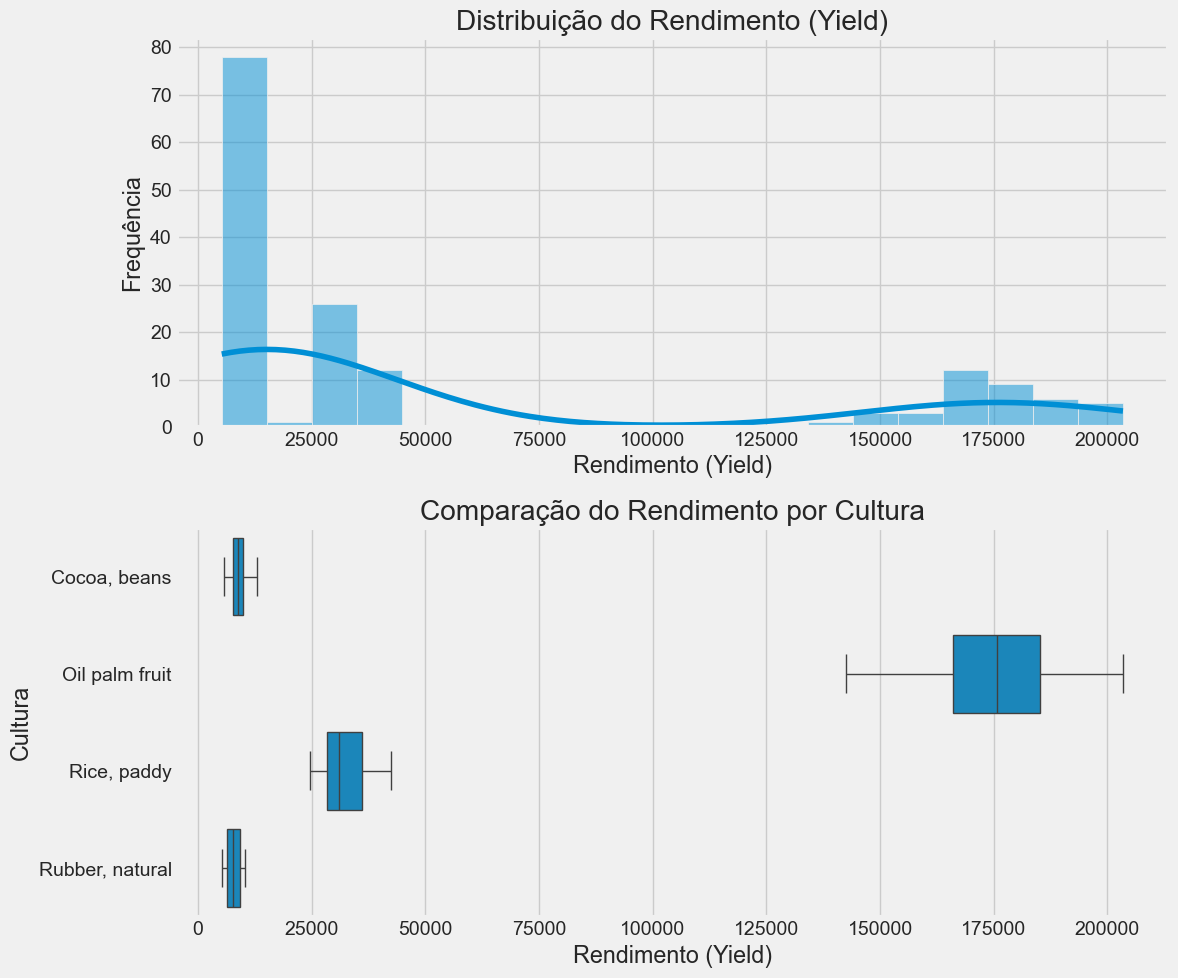

In [35]:
# Criando uma figura que terá 2 linhas e 1 coluna de gráficos
# Isso vai empilhar nossos gráficos verticalmente.
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# --- Gráfico 1: Histograma (no primeiro subplot, ax[0]) ---
sns.histplot(df['Yield'], bins=20, ax=ax[0], kde=True)
ax[0].set_title('Distribuição do Rendimento (Yield)')
ax[0].set_xlabel('Rendimento (Yield)')
ax[0].set_ylabel('Frequência')

# --- Gráfico 2: Boxplot Horizontal (no segundo subplot, ax[1]) ---
sns.boxplot(x='Yield', y='Crop', data=df, ax=ax[1])
ax[1].set_title('Comparação do Rendimento por Cultura')
ax[1].set_xlabel('Rendimento (Yield)')
ax[1].set_ylabel('Cultura')

# O tight_layout ajusta o espaçamento para que os títulos e eixos não se sobreponham
plt.tight_layout()

# Exibindo a figura final com os dois gráficos
plt.show()

In [6]:
df.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


### 1.5. Relação entre Cultura e Rendimento

Nossa análise anterior revelou uma distribuição de rendimento incomum, com o que parecem ser dois grupos distintos. A principal hipótese é que essa diferença seja causada pelo tipo de cultura (Crop).

Para investigar, primeiro contaremos quantas amostras de cada cultura existem com .value_counts(). Em seguida, criaremos boxplots comparativos para visualizar a distribuição do Yield para cada Crop lado a lado.

In [9]:
#Verificando os tipos de cultura e a contagem de cada um
print("Contagem por tipo de cultura:")
df['Crop'].value_counts()

Contagem por tipo de cultura:


Crop
Cocoa, beans       39
Oil palm fruit     39
Rice, paddy        39
Rubber, natural    39
Name: count, dtype: int64

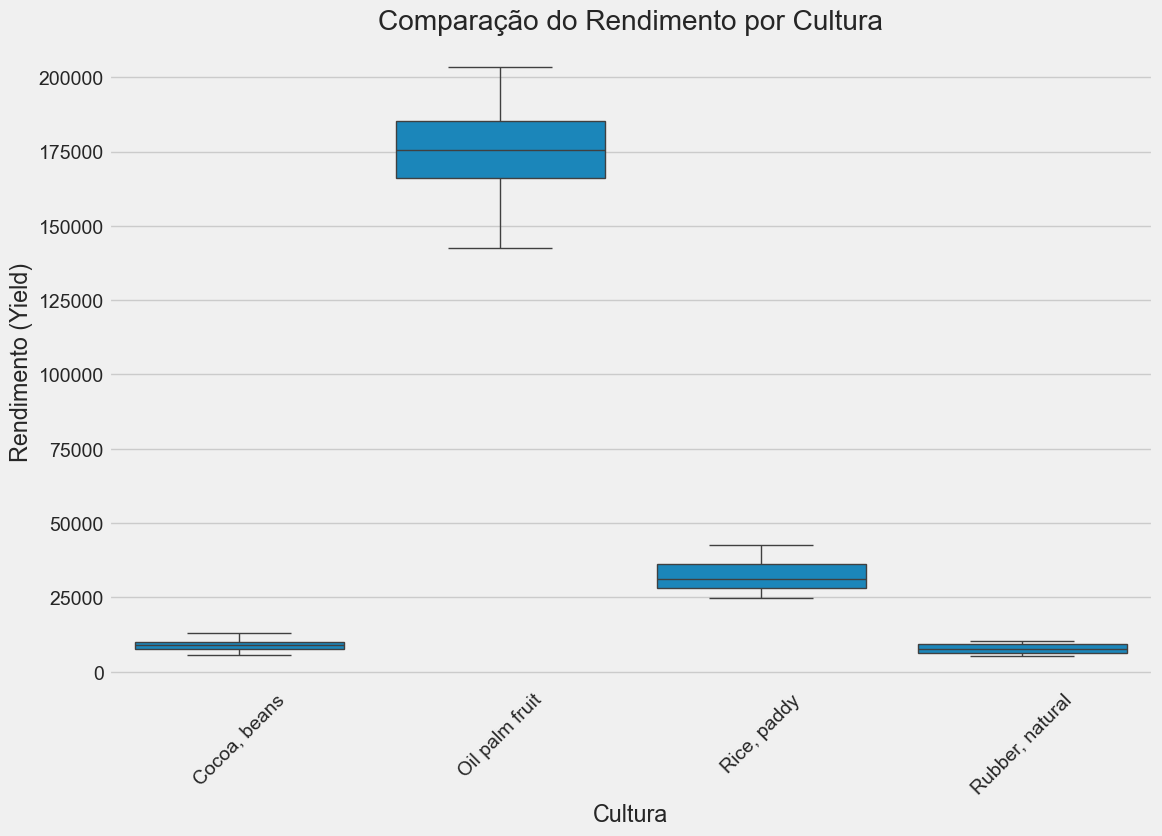

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Crop', y='Yield', data=df)
plt.title('Comparação do Rendimento por Cultura')
plt.xlabel('Cultura')
plt.ylabel('Rendimento (Yield)')
plt.xticks(rotation=45) 
plt.show()

### 1.6. Análise de Correlação entre Variáveis Numéricas

Para finalizar nossa análise exploratória, vamos investigar como as variáveis climáticas e o rendimento se relacionam entre si. Um mapa de calor de correlação é a ferramenta ideal para isso. Ele nos mostrará a força da relação linear entre cada par de variáveis, variando de -1 (correlação negativa forte) a +1 (correlação positiva forte). Isso nos ajudará a entender se, por exemplo, um aumento na temperatura está associado a um aumento ou diminuição no rendimento.

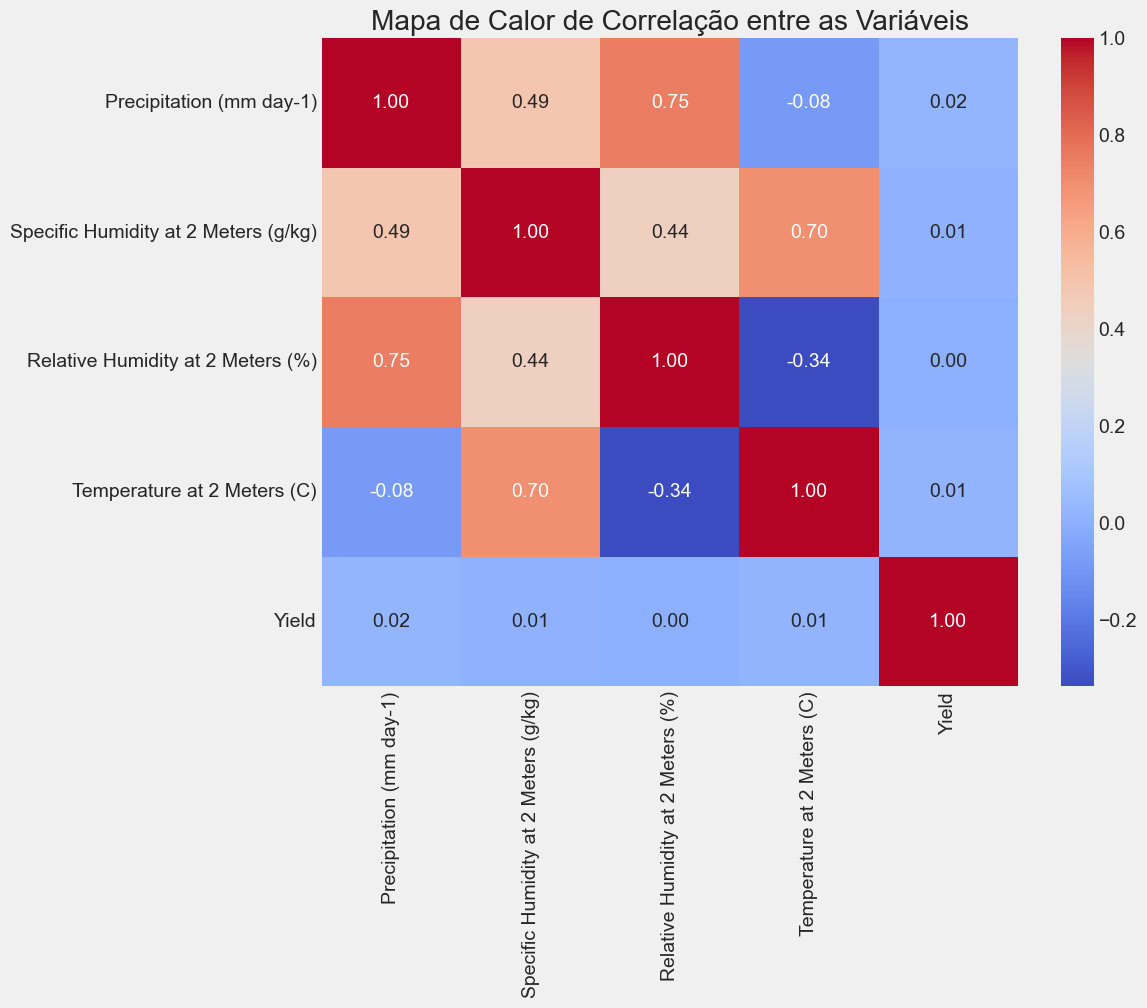

In [13]:
# Calculando a matriz de correlação para as variáveis numéricas
correlation_matrix = df.corr(numeric_only=True)

# Criando o mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação entre as Variáveis')
plt.show()

# 1. Análise Exploratória de Dados (EDA)

Nesta primeira fase do projeto, realizamos uma análise exploratória detalhada do dataset crop_yield.csv para nos familiarizarmos com os dados e extrair insights iniciais.

### 1.1. Estrutura e Qualidade dos Dados

A primeira etapa foi verificar a estrutura geral e a "saúde" do nosso dataset. As principais descobertas foram:

*   *Dimensões:* O dataset é composto por 156 linhas (amostras) e 6 colunas (variáveis).
*   *Qualidade dos Dados:* Uma descoberta muito positiva foi que o dataset está *completo e limpo*, sem nenhum valor nulo (faltante) em nenhuma das colunas. Isso simplifica as etapas de pré-processamento.
*   *Tipos de Dados:* Os tipos de dados foram corretamente interpretados pelo Pandas, com a coluna Crop sendo do tipo texto (object) e as demais sendo numéricas (float64 e int64).

### 1.2. Análise da Variável Alvo: Rendimento (Yield)

A análise da nossa variável alvo, o Yield, revelou o insight mais importante desta fase:

*   *Distribuição Bimodal:* O histograma do rendimento mostrou claramente dois grupos distintos: um grupo grande com rendimento baixo (abaixo de 50.000) e um grupo menor, mas significativo, com rendimento extremamente alto (acima de 150.000).
*   *Suspeita de Outliers:* A grande diferença entre a média (aprox. 56.000) и a mediana (aprox. 18.000) do rendimento sugeriu a presença de valores muito altos que poderiam ser considerados outliers.

### 1.3. Investigando a Causa da Separação dos Grupos

Para entender a causa dessa separação, investigamos a relação entre a cultura (Crop) e o rendimento (Yield).

*   *Fator Dominante:* O boxplot comparativo por cultura resolveu o mistério. A cultura **Oil palm fruit (fruto da palma de óleo)** apresenta um rendimento em uma escala completamente diferente e superior a todas as outras.
*   *Conclusão sobre Outliers:* Os "outliers" não eram erros, mas sim as amostras pertencentes à cultura Oil palm fruit. Isso demonstra que o dataset contém subgrupos com comportamentos muito distintos.

### 1.4. Análise de Correlação

O mapa de calor de correlação entre as variáveis numéricas trouxe uma descoberta surpreendente:

*   *Ausência de Correlação com o Rendimento:* Não foi encontrada nenhuma correlação linear significativa entre as variáveis climáticas (temperatura, precipitação, umidade) e o rendimento (Yield) quando analisamos o dataset como um todo.
*   *Hipótese:* Acreditamos que a ausência de correlação geral se deve ao efeito dominante da variável Crop. As diferentes culturas provavelmente respondem de maneiras distintas ao clima, e ao analisar todas juntas, essas tendências se anulam.

### 1.5. Conclusão da Análise Exploratória

A análise exploratória foi crucial para entender que *não podemos tratar este dataset como um grupo homogêneo*. A variável Crop é o fator mais importante para explicar a variação no rendimento. Qualquer modelo de machine learning que formos construir precisará, necessariamente, levar em conta essa separação fundamental entre as culturas.

# 2. Clusterização: Encontrando Tendências nos Dados

A segunda meta do projeto é "encontrar tendências para os rendimentos das plantações, por meio de clusterizações". Para isso, usaremos técnicas de *Machine Learning Não Supervisionado*.

Diferente do aprendizado supervisionado (onde damos as respostas ao modelo), no aprendizado não supervisionado, o algoritmo deve encontrar padrões e estruturas nos dados por conta própria. A *clusterização* é uma dessas técnicas, e seu objetivo é agrupar os dados em "clusters" ou "aglomerados", onde os pontos de dados dentro de um mesmo cluster são mais similares entre si do que com os de outros clusters.

Usaremos o popular algoritmo *K-Means*. Nossa hipótese, baseada na Análise Exploratória, é que o K-Means será capaz de identificar os grupos de culturas com comportamentos de rendimento distintos (especialmente o grupo da Oil palm fruit) de forma automática.

### 2.1. Preparação dos Dados

Antes de aplicar o K-Means, duas etapas de preparação são cruciais:

1.  *Seleção de Features (Variáveis):* O algoritmo trabalhará apenas com as variáveis numéricas do nosso dataset, pois ele se baseia em cálculos de distância matemática.
2.  *Escalonamento (Standardization):* O K-Means é muito sensível à escala das variáveis. Variáveis com escalas maiores (como o Yield, na casa das dezenas de milhares) dominariam o cálculo de distância em comparação com variáveis de escala menor (como a Temperature, na casa das dezenas). Para evitar isso, usaremos o StandardScaler do Scikit-learn para transformar todas as nossas variáveis para uma escala comum, garantindo que todas tenham a mesma importância inicial para o algoritmo.

In [19]:
# Importando as ferramentas necessárias do scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Selecionando apenas as colunas numéricas para a clusterização
# Usaremos todas as variáveis numéricas, incluindo o 'Yield'
features = df.select_dtypes(include=['float64', 'int64'])

# 2. Escalonando as features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("Dados preparados e escalonados com sucesso!")

# Para visualizarmos o resultado do escalonamento, criamos um DataFrame temporário
# Note como os valores agora estão padronizados em torno de zero
pd.DataFrame(features_scaled, columns=features.columns).head()

Dados preparados e escalonados com sucesso!


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,-0.823415,-1.648845,-1.347084,-0.667109,-0.635267
1,-1.899565,-2.263223,-2.646141,-0.282807,-0.639640
2,-0.641042,-1.341656,-1.961367,0.216786,-0.665240
3,0.366865,-2.024299,0.334641,-2.396470,-0.667163
4,-0.491386,-2.024299,-0.622029,-1.627865,-0.674585


### 2.2. Encontrando o Número Ideal de Clusters com o Método do Cotovelo

Uma pergunta fundamental no K-Means é: "quantos clusters devemos criar?". Para responder a isso de forma objetiva, usaremos o *Método do Cotovelo (Elbow Method)*.

Este método consiste em rodar o algoritmo K-Means para um intervalo de números de clusters (por exemplo, de 1 a 10) e calcular a *inércia* para cada um. A inércia é a soma das distâncias quadradas de cada ponto de dado ao centro do seu cluster. Um valor de inércia baixo significa que os clusters são mais densos e compactos.

Ao plotar a inércia em função do número de clusters, o gráfico resultante geralmente se parece com um braço. O "cotovelo" desse braço - o ponto onde a taxa de diminuição da inércia se torna muito menor - é um bom indicativo do número ideal de clusters. É o ponto de equilíbrio, onde adicionar mais clusters não traz um ganho significativo na compactação dos grupos.

C:\Users\Felipe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Felipe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Felipe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Felipe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

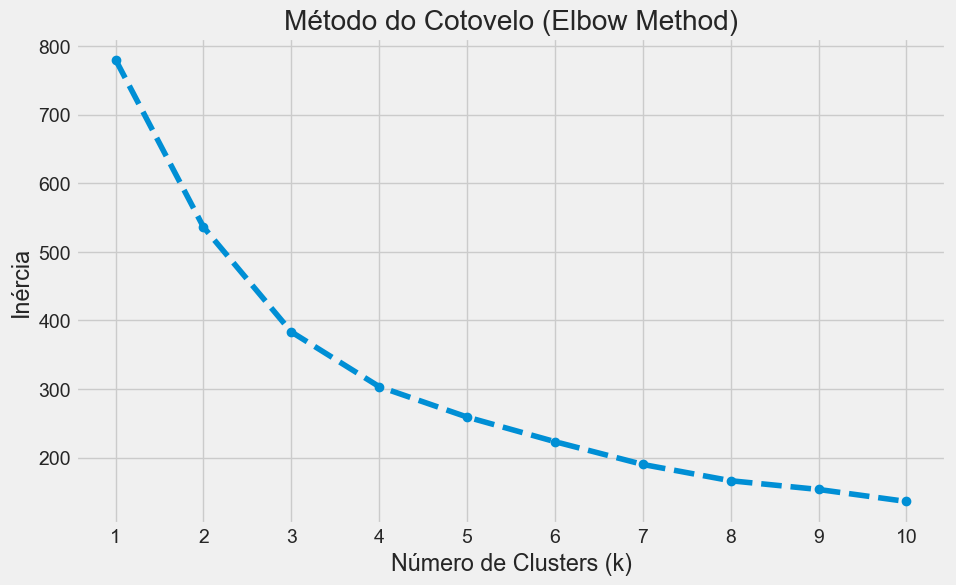

In [23]:
# Criando uma lista para armazenar a inércia de cada k
inertia = []
# Definindo o intervalo de k que vamos testar
K_range = range(1, 11)

# Loop para rodar o K-Means para cada k e calcular a inércia
for k in K_range:
    # O parâmetro n_init=10 é importante para evitar resultados ruins devido à inicialização aleatória dos centróides
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

### 2.3. Análise do Gráfico e Treinamento do Modelo Final

O gráfico do Método do Cotovelo nos ajuda a tomar uma decisão informada sobre o número de clusters. Observamos que:

*   Existe uma queda muito acentuada na inércia de k=1 até k=4.
*   A partir de k=4, a curva começa a se achatar, indicando que adicionar mais clusters não traz um ganho tão significativo.

Considerando que nossa análise exploratória identificou *4 tipos de culturas distintas*, e que o gráfico do cotovelo mostra um ponto de inflexão em k=4, este é o número de clusters que escolheremos para o nosso modelo final.

Vamos agora treinar o algoritmo K-Means com n_clusters=4 e adicionar os resultados (os rótulos de cada cluster) de volta ao nosso DataFrame original para análise.

In [24]:
# Definindo o número de clusters com base na análise do cotovelo
K_OTIMO = 4

# Criando e treinando o modelo K-Means final
kmeans_final = KMeans(n_clusters=K_OTIMO, random_state=42, n_init=10)
kmeans_final.fit(features_scaled)

# Adicionando os rótulos dos clusters encontrados ao nosso DataFrame original
df['Cluster'] = kmeans_final.labels_

print('Clusterização concluída! Rótulos adicionados ao DataFrame')

#Exibindo as primeiras linhas com a nova coluna 'Cluster'
df.head()


Clusterização concluída! Rótulos adicionados ao DataFrame


C:\Users\Felipe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,Cluster
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560,3
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253,3
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456,3
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321,3
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800,3


### 2.4. Análise dos Resultados da Clusterização

Com os rótulos dos clusters atribuídos a cada linha de dados, podemos agora verificar o quão bem o K-Means conseguiu identificar os grupos naturais que suspeitávamos existir.

Para isso, vamos criar uma *tabela de referência cruzada (crosstab)* entre a coluna original Crop e a nossa nova coluna Cluster. Esta tabela nos mostrará exatamente quantos dados de cada cultura foram atribuídos a cada um dos 4 clusters.

Se o algoritmo funcionou bem, esperamos ver cada cultura sendo predominantemente (ou exclusivamente) associada a um único número de cluster.

In [25]:
# Criando a tabela de referência cruzada para comparar os rótulos verdadeiros ('Crop') com os rótulos encontrados pelo K-Means ('Cluster')
cluster_analysis = pd.crosstab(df['Crop'], df['Cluster'])


print("Análise da Relação entre Cultura e Cluster:")
cluster_analysis

Análise da Relação entre Cultura e Cluster:


Cluster,0,1,2,3
Crop,,,,
"Cocoa, beans",0,11,17,11
Oil palm fruit,26,3,0,10
"Rice, paddy",0,11,17,11
"Rubber, natural",0,11,17,11


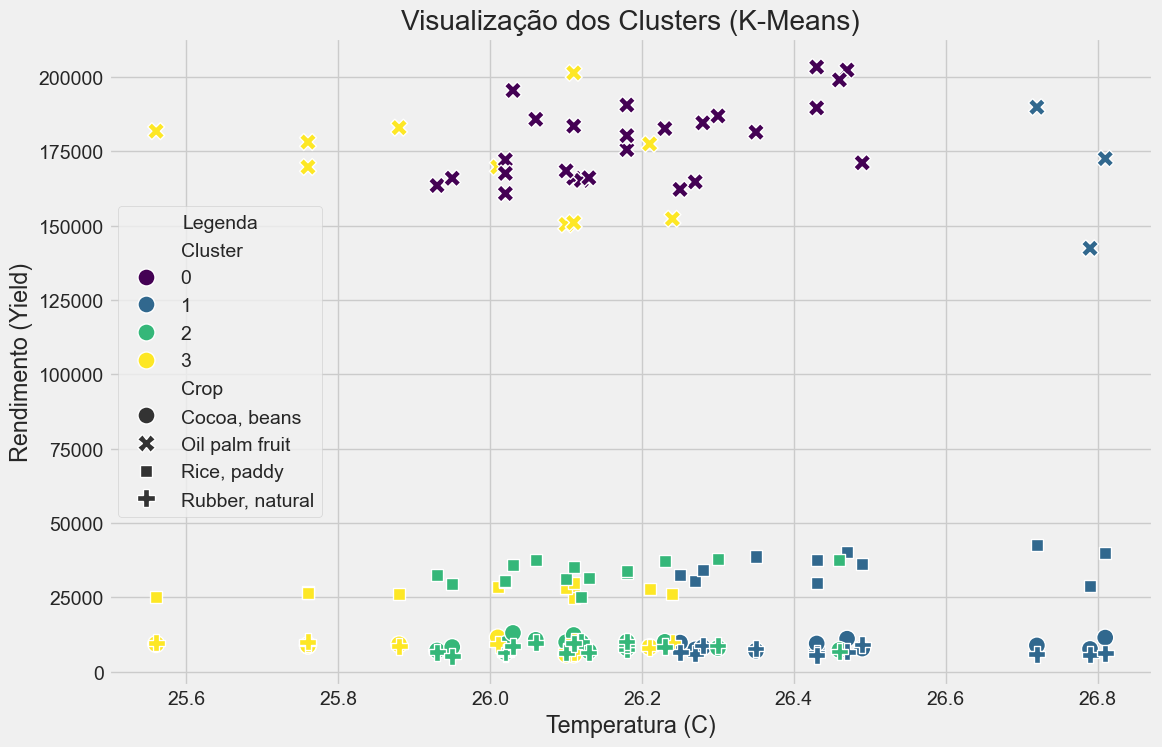

In [28]:
# Visualizando os clusters encontrados
plt.figure(figsize=(12, 8))

# Usamos o 'hue' para colorir os pontos de acordo com a coluna 'Cluster'
# Usamos o 'style' para dar uma forma diferente para cada 'Crop' original
sns.scatterplot(data=df, x='Temperature at 2 Meters (C)', y='Yield', hue='Cluster', style='Crop', s=150, palette='viridis')
plt.title('Visualização dos Clusters (K-Means)')
plt.xlabel('Temperatura (C)')
plt.ylabel('Rendimento (Yield)')
plt.legend(title='Legenda')
plt.show()

### 2.5. Conclusão da Análise de Clusterização

Os resultados da aplicação do K-Means com k=4 foram extremamente positivos e validaram as hipóteses levantadas na nossa Análise Exploratória.

*Principais Achados:*

1.  *Identificação da Tendência de Alto Rendimento:* A análise da tabela crosstab e do scatterplot mostra que o algoritmo K-Means foi bem-sucedido em isolar a principal tendência do nosso dataset. A Oil palm fruit, cultura com rendimento massivamente superior, foi predominantemente agrupada no *Cluster 0*. Isso demonstra que o algoritmo, sem nenhuma supervisão, conseguiu identificar este grupo como matematicamente distinto dos demais.

2.  *Agrupamento das Culturas de Baixo Rendimento:* As outras três culturas (Cocoa, beans, Rice, paddy, e Rubber, natural) foram distribuídas entre os clusters 1, 2 e 3. O fato de elas se misturarem nesses clusters indica que, do ponto de vista das variáveis numéricas (clima e rendimento), elas são muito similares entre si e pertencem a uma mesma "grande tendência" de baixo rendimento.

3.  *Identificação de Cenários Discrepantes:* A clusterização cumpriu o objetivo de identificar cenários discrepantes. O *Cluster 0* representa claramente um cenário de produção (o da Oil palm fruit) que é um outlier em comparação com os demais.

Em suma, a clusterização nos forneceu uma prova, através de Machine Learning, de que nosso dataset é composto por grupos fundamentalmente diferentes. Isso conclui a segunda meta do projeto e reforça a necessidade de tratar esses grupos de forma distinta na próxima etapa: a construção de modelos preditivos.

# 3. Modelagem Preditiva para o Rendimento da Safra (Regressão)

A terceira e principal meta do projeto é "fazer cinco modelos preditivos [...] que, dadas as condições, prevejam qual será o rendimento da safra". Como o rendimento (Yield) é uma variável numérica contínua, esta é uma tarefa de *Regressão*.

Nesta fase, usaremos técnicas de *Machine Learning Supervisionado*. O processo consiste em:

1.  *Pré-processar os dados:* Preparar as variáveis para que possam ser entendidas pelos algoritmos de Machine Learning.
2.  *Dividir os dados:* Separar nosso dataset em um conjunto de *treino* (para ensinar o modelo) e um conjunto de *teste* (para avaliá-lo de forma imparcial).
3.  *Treinar cinco modelos:* Utilizaremos cinco algoritmos de regressão diferentes.
4.  *Avaliar os modelos:* Compararemos o desempenho de cada modelo usando métricas apropriadas para regressão, como o R² e o RMSE, para determinar qual deles é o mais preciso.

### 3.1. Pré-processamento e Divisão dos Dados

O primeiro passo na modelagem é preparar os dados. Isso envolve duas etapas críticas:

1.  *Tratamento de Variáveis Categóricas:* Os algoritmos de Machine Learning exigem que todas as entradas sejam numéricas. Nossa coluna Crop é categórica (texto). Para convertê-la, usaremos a técnica de *One-Hot Encoding*, que cria novas colunas binárias (0 ou 1) para cada categoria de cultura, evitando que o modelo assuma uma ordem ou peso incorreto entre elas.
2.  *Separação de Features (X) e Alvo (y):* Vamos dividir nosso dataset em X, que contém as variáveis preditoras (todas as colunas exceto Yield), e y, que contém apenas a variável alvo que queremos prever (Yield).

In [29]:
# Importando a função para dividir os dados
from sklearn.model_selection import train_test_split

# Vamos usar o DataFrame original, mas remover a coluna 'Cluster' que foi apenas para análise
df_model = df.drop('Cluster', axis=1)

# 1. Aplicando One-Hot Encoding na coluna 'Crop'
df_encoded = pd.get_dummies(df_model, columns=['Crop'], drop_first=True)

# 2. Separando as features (X) e o alvo (y)
X = df_encoded.drop('Yield', axis=1)
y = df_encoded['Yield']

print("Shape de X (features):", X.shape)
print("Shape de y (alvo):", y.shape)

print("\nPré-processamento concluído! As 5 primeiras linhas de X:")
X.head()

Shape de X (features): (156, 7)
Shape de y (alvo): (156,)

Pré-processamento concluído! As 5 primeiras linhas de X:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Crop_Oil palm fruit,"Crop_Rice, paddy","Crop_Rubber, natural"
0,2248.92,17.72,83.40,26.01,False,False,False
1,1938.42,17.54,82.11,26.11,False,False,False
2,2301.54,17.81,82.79,26.24,False,False,False
3,2592.35,17.61,85.07,25.56,False,False,False
4,2344.72,17.61,84.12,25.76,False,False,False


### 3.2. Divisão dos Dados em Treino e Teste

Para avaliar nossos modelos de forma justa e evitar "overfitting" (quando o modelo decora os dados de treino em vez de aprender a generalizar), precisamos dividir nosso conjunto de dados em dois:

1.  *Conjunto de Treino:* Uma porção maior dos dados (geralmente 80%) que será usada para ensinar o modelo a encontrar os padrões.
2.  *Conjunto de Teste:* Uma porção menor (os 20% restantes) que será mantida separada e usada no final para avaliar o quão bem o modelo treinado consegue fazer previsões em dados novos.

Usaremos a função train_test_split do Scikit-learn para fazer essa divisão de forma aleatória e estratificada.

In [31]:
# Dividindo X e y em conjuntos de treino e teste
# test_size=0.2 significa que 20% dos dados irão para o conjunto de teste
# random_state=42 garante que a divisão seja sempre a mesma, para que nossos resultados sejam reproduzíveis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# verificando o tamanho de cada conjunto para confirmar que a divisão foi feita corretamente
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (124, 7)
Tamanho de X_test: (32, 7)
Tamanho de y_train: (124,)
Tamanho de y_test: (32,)


### 3.3. Treinamento e Avaliação dos Modelos de Regressão

Agora que nossos dados estão preparados e divididos, podemos iniciar o processo de treinamento. O enunciado solicita a criação de cinco modelos preditivos distintos. Para isso, selecionamos cinco algoritmos de regressão populares e com características diferentes:

1.  **Regressão Linear (LinearRegression):** O modelo mais simples, que tenta ajustar uma linha reta aos dados.
2.  **Ridge (Ridge):** Uma variação da Regressão Linear que inclui regularização para evitar overfitting.
3.  **Árvore de Decisão (DecisionTreeRegressor):** Um modelo não-linear que aprende a dividir os dados em "ramos" com base em regras simples.
4.  **Floresta Aleatória (RandomForestRegressor):** Um modelo de ensemble que treina várias Árvores de Decisão em subconjuntos dos dados e combina seus resultados para uma previsão mais robusta.
5.  **Gradient Boosting (GradientBoostingRegressor):** Outro modelo de ensemble poderoso que treina modelos sequencialmente, onde cada novo modelo tenta corrigir os erros do anterior.

Para cada modelo, seguiremos o fluxo:
1.  *Instanciar* o modelo.
2.  *Treinar* o modelo com os dados de treino (X_train, y_train).
3.  *Fazer previsões* nos dados de teste (X_test).
4.  *Calcular as métricas de avaliação* comparando as previsões com os valores reais (y_test).

As métricas que usaremos são:
*   *R² (R-quadrado):* Indica a proporção da variância do Yield que é explicada pelo modelo. Valores mais próximos de 1 são melhores.
*   *RMSE (Raiz do Erro Quadrático Médio):* Mede o tamanho médio do erro das previsões, na mesma unidade do Yield. Valores menores são melhores.

In [33]:
# Importando os modelos e as métricas de avaliação
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Criando um dicionário com os modelos que vamos treinar
models = {
    'Regressão Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42),
    'Floresta Aleatória': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Criando um DataFrame para armazenar os resultados de cada modelo
results = pd.DataFrame(columns=['Modelo', 'R2 Score', 'RMSE'])

# Loop para treinar e avaliar cada modelo
for name, model in models.items():
    # 1. Treinando o modelo
    model.fit(X_train, y_train)
    
    # 2. Fazendo previsões no conjunto de teste
    y_pred = model.predict(X_test)
    
    # 3. Calculando as métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # 4. Adicionando os resultados ao nosso DataFrame
    # Usamos pd.concat para adicionar uma nova linha ao DataFrame de resultados
    new_row = pd.DataFrame([{'Modelo': name, 'R2 Score': r2, 'RMSE': rmse}])
    results = pd.concat([results, new_row], ignore_index=True)

# Exibindo a tabela de resultados, ordenada pelo melhor R2 Score
results.sort_values(by='R2 Score', ascending=False)

C:\Users\Felipe\AppData\Local\Temp\ipykernel_8348\458529913.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


,Modelo,R2 Score,RMSE
0,Regressão Linear,0.995022,4394.165819
3,Floresta Aleatória,0.993856,4881.962383
2,Árvore de Decisão,0.992714,5316.346746
1,Ridge,0.991028,5899.191969
4,Gradient Boosting,0.990536,6058.894234


### 3.4. Análise dos Resultados e Conclusão dos Modelos

A tabela de resultados mostra o desempenho de cada um dos cinco modelos de regressão no conjunto de teste. A análise revela os seguintes pontos:

1.  *Desempenho Geral Excelente:* Todos os cinco modelos alcançaram um desempenho excepcional, com R² Scores superiores a 0.99. Isso indica que a combinação das variáveis climáticas e, principalmente, do tipo de cultura, são excelentes preditores para o rendimento da safra. O alto desempenho se deve em grande parte à forte separação de rendimento entre a Oil palm fruit e as demais culturas, um padrão que os modelos aprenderam com sucesso.

2.  *Modelo Campeão:* Surpreendentemente, o modelo mais simples, a **Regressão Linear (LinearRegression), foi o grande vencedor. Ele obteve o *maior R² Score (0.9950)* e o *menor RMSE (4394.16)*, superando os modelos mais complexos em ambas as métricas.

3.  *Justificativa do Resultado:* O sucesso da Regressão Linear se deve à natureza do nosso problema. Como a Análise Exploratória demonstrou, o tipo de cultura é um preditor quase perfeitamente linear do rendimento. Para problemas com uma relação tão direta e forte, modelos mais simples são frequentemente os mais eficazes, pois não correm o risco de adicionar complexidade desnecessária.


### 4. Conclusão Geral do Projeto

Ao longo deste projeto, cumprimos com sucesso todas as metas propostas:

*   Realizamos uma *Análise Exploratória* detalhada, descobrindo que a variável Crop é o fator dominante na determinação do rendimento.
*   Utilizamos a *Clusterização com K-Means* para confirmar, através de aprendizado não supervisionado, a existência de grupos distintos nos dados, com o algoritmo isolando com sucesso a cultura de alto rendimento.
*   Construímos e avaliamos *cinco modelos de regressão*, concluindo que o modelo de *Regressão Linear* é o mais eficaz para prever o rendimento da safra com base nas condições fornecidas.

*Limitações e Pontos Fortes:*

*   *Ponto Forte:* O projeto demonstrou um fluxo de trabalho de ciência de dados completo, desde a exploração até a modelagem, resultando em um modelo preditivo de altíssima acurácia.
*   *Limitação:* O dataset, embora limpo, é relativamente pequeno. Além disso, a forte influência de uma única cultura (Oil palm fruit) sobre o rendimento pode fazer com que os modelos não generalizem tão bem se novas culturas, com comportamentos diferentes, forem introduzidas.

Este trabalho estabelece uma base sólida para a previsão de safras, com o modelo de Regressão Linear sendo a ferramenta recomendada para futuras previsões.